# Smooth Extension for Cubic EOS

This notbook provides an explaination of the smooth extension for cubic equations of state. This extension avoids numerical problems when the real root for a phase disappears. The existance of a real rool for the cubic equation does not indicate that a phase necessarily exists, so any implimentaion using this smooth extension should calculate an a phase fraction for anything having a fake root at zero or very close to very close to zero. 

The fisrt part of this shows the calculations for the smooth extension.  The extension is created by mirroring the cubic equation veritally and horizontally about the turning point. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, exp, arccos, cos, sin

In [2]:
def curoot(z):
    if z >= 0:
        return z**(1.0/3.0)
    else:
        return -(-z)**(1.0/3.0)
    
def funcs(shape=0.5):
    # shape < 1, determinant > 0, not monotonic, two f'(z) = 0 points
    # shape = 1, determinant = 0, nonstrictly increasing, double f'(z) = 0 points
    # shape > 1, determinant < 0, strictly increasing, no f'(z) = 0 points
    curve_shape = shape
    b = -1.8
    c = (b**2/3.0)*curve_shape
    d = -0.5
    
    def f(z): # this is the original cubic
        return z**3 + b*z**2 + c*z + d
        
    inflect = -b/3.0 # cubic inflection point
    det = b**2 - 3*c # determinant


    ##
    ## Vapor and liquid extensions for when determinant is greater than 0
    ## and liquid or vapor root doesn't exist.  If determinant is <= 0
    ## the same root will be returned for both. phase = -1 for liquid and
    ## 1 for vapor.
    ##
    def f_ext(z, phase):
        a = 2*(-b + phase*sqrt(abs(det)))/3.0
        b_prime = -(b+3*a)
        c_prime = 3*a**2 + 2*b*a + c
        d_prime = -(0.75*a**3 + 0.5*b*a**2 - d)
        return z**3 + b_prime*z**2 + c_prime*z + d_prime
    
    ##
    ## Smoothed versions using extention where needed.
    ##
    def f_liq_smooth(z):
        if det > 0:
            a = -1.0/3.0*b - 1.0*sqrt(det)/3.0
            if z > a:
                return f_ext(z, -1)
            else:
                return f(z)
        else: 
            return f(z)

    def f_vap_smooth(z):
        if det > 0:
            a = -1.0/3.0*b + 1.0*sqrt(det)/3.0
            if z < a:
                return f_ext(z, 1)
            else:
                return f(z)
        else: 
            return f(z)
    
    return (f, f_liq_smooth, f_vap_smooth)

def plot_them(shape=0.5):
    # a function to plot the approximation functions
    # blue line = liquid root
    # red line = vapor root
    # green + = original cubic
    z = np.arange(-1, 2, 0.1)
    f, ff1, ff2 = funcs(shape=shape)
    plt.plot(z, list(map(ff1, z)), "-b", z, list(map(ff2, z)), "-r", z, f(z), "+g")
    ax = plt.gca()
    ax.set_ylim([-2, 2])
    plt.xlabel("z")
    plt.ylabel("f(z)")
    ax.axhline(color="purple")

## Plots

These plots show the extended liquid and vapor cubic equations.  The liquid root is where the blue line crosses the horizontal purple line.  The vapor root is where the red line crosses the purple line.  The green "+" symbols represent the original cubic, which in this case doesn't have a real liquid root.  When the determiniant is greater than less than zero, the same root is returned for both the liquid and vapor root.

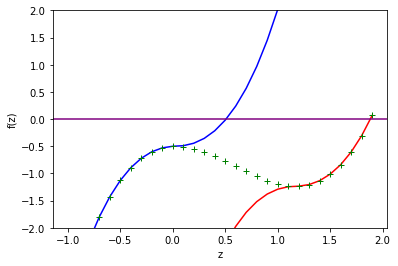

In [3]:
plot_them(shape=0.1)

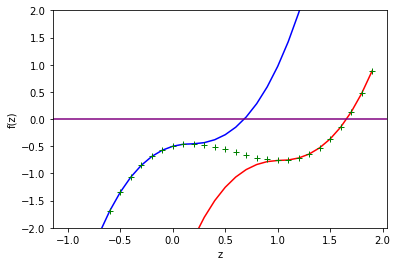

In [4]:
plot_them(0.5)

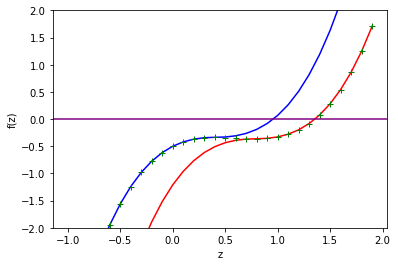

In [5]:
plot_them(0.9)

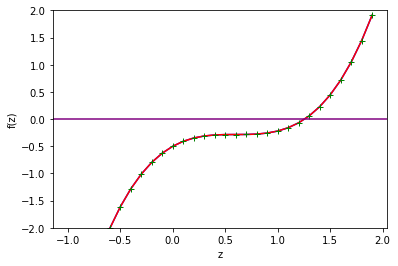

In [6]:
plot_them(1.0)

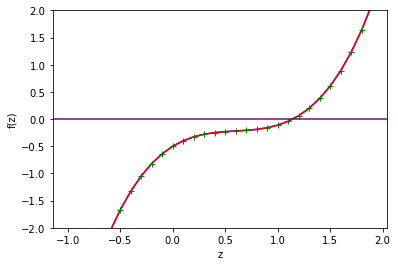

In [7]:
plot_them(1.1)

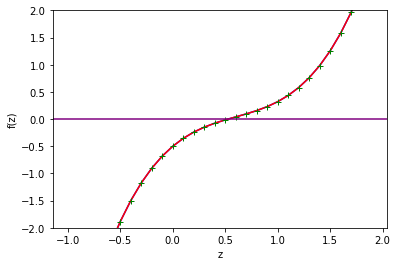

In [8]:
plot_them(1.5)

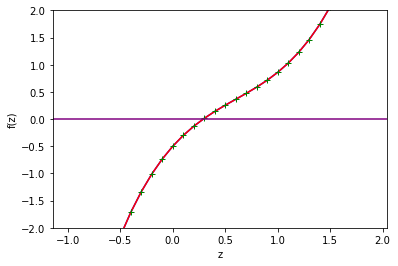

In [9]:
plot_them(2)